# Testing Plots
With a refinement example and an averaging example...

In [1]:
cd ..

/Users/growland/workspace/auspex


In [8]:
import itertools
import numpy as np

from auspex.filters.plot import Plotter, MeshPlotter
from auspex.filters.average import Averager
from auspex.filters.io import WriteToHDF5
from auspex.refine import delaunay_refine_from_file

from test.plotting_test_avg  import TestExperiment as TestAvg
from test.plotting_test_mesh import TestExperiment as TestMesh

## First Try the Averaging Example ##

In [9]:
exp = TestAvg()
avg = Averager("repeats", name="Averager")
pl1 = Plotter(name="Partial", plot_dims=2, plot_mode="real", palette="Spectral11", notebook=True)
pl2 = Plotter(name="Final", plot_dims=2, plot_mode="real", palette="Spectral11", notebook=True)

edges = [
        (exp.voltage, avg.sink),
        (avg.partial_average, pl1.sink),
        (avg.final_average, pl2.sink)
        ]

avg.update_interval = 0.5

exp.set_graph(edges)
exp.init_instruments()
exp.run_sweeps()

auspex-WARNING: 2017-01-10 14:39:20,633 ----> Instrument {} is using a generic instrument interface as none was provided.
auspex-WARNING: 2017-01-10 14:39:20,633 ----> Instrument {} is using a generic instrument interface as none was provided.
auspex-INFO: 2017-01-10 14:39:20,634 ----> Plot will clear after every 10000 points.
auspex-INFO: 2017-01-10 14:39:20,634 ----> Plot will clear after every 10000 points.
auspex-INFO: 2017-01-10 14:39:20,646 ----> Plot will clear after every 10000 points.
auspex-INFO: 2017-01-10 14:39:20,646 ----> Plot will clear after every 10000 points.
auspex-INFO: 2017-01-10 14:39:23,742 ----> Displaying in iPython notebook
auspex-INFO: 2017-01-10 14:39:23,742 ----> Displaying in iPython notebook


Loading BokehJS ...

Killing bokeh server thread 23269


## Now Try the Refinement Example ##
Note that this requires the `Adapt` package

In [3]:
exp  = TestMesh()
fig1 = MeshPlotter(name="Plot The Mesh", notebook=True)
wr   = WriteToHDF5("test_mesh.h5")

edges = [(exp.voltage, wr.sink)]
exp.set_graph(edges)
exp.add_direct_plotter(fig1)

# Construct the coarse grid
coarse_ts = np.linspace(0.0, 10.0, 7)
coarse_vs = np.linspace(0.0, 7.5, 7)
points    = [coarse_ts, coarse_vs]
points    = list(itertools.product(*points))

refine_func = delaunay_refine_from_file(wr, 'duration', 'amplitude', 'voltage', max_points=1000, plotter=fig1)

exp.add_sweep([exp.duration, exp.amplitude], points, refine_func=refine_func)
exp.run_sweeps()

auspex-INFO: 2017-01-10 14:31:58,347 ----> Displaying in iPython notebook
auspex-INFO: 2017-01-10 14:31:58,347 ----> Displaying in iPython notebook


Loading BokehJS ...

20 new points added.
Reached 69 points.
22 new points added.
Reached 91 points.
37 new points added.
Reached 128 points.
26 new points added.
Reached 154 points.
66 new points added.
Reached 220 points.
56 new points added.
Reached 276 points.
101 new points added.
Reached 377 points.
145 new points added.
Reached 522 points.
220 new points added.
Reached 742 points.
170 new points added.
Reached 912 points.
407 new points added.
Reached maximum points (1000).
Killing bokeh server thread 23120


Note that Bokeh has some weird glitches that aren't visible in, e.g., matplotlib

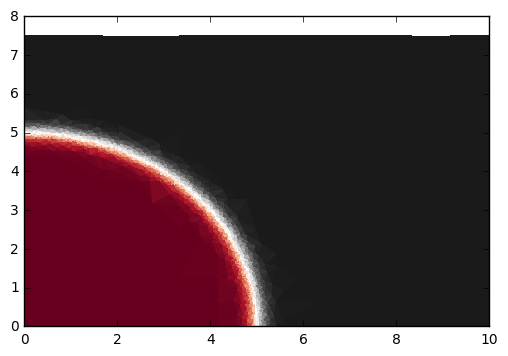

In [5]:
# import h5py
import auspex.analysis.switching as sw
import matplotlib.pyplot as plt
%matplotlib inline
with h5py.File(wr.filename.value) as f:
    zs = f['main']['data'].value['voltage']
    ys = f['main']['data'].value['amplitude']
    xs = f['main']['data'].value['duration']
    points = np.array([xs, ys]).transpose()
    
    mesh, scale_factors = sw.scaled_Delaunay(points)
    plt.tripcolor(xs, ys, mesh.simplices, zs, cmap=plt.cm.RdGy)
    plt.show()